# 2D Regression with a Two-Layer Neural Network

We'll implement a script to regress 1D data using a two-layer dense neural network.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_linear.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-0.01264992 -0.85443355]
 [ 0.76032383 -0.97434942]
 [ 0.01950686  0.27497154]
 [-1.58945469 -1.54899742]
 [-0.4683091   0.04368673]
 [-0.07725676  0.35296562]
 [-0.88869315  0.9471676 ]
 [-0.28959776 -0.32629691]
 [-0.3686084   0.77991726]
 [-0.01630287  0.69537186]
 [ 1.04251786  0.30325747]
 [-1.02762036  0.28614963]
 [ 1.35221365  0.00522689]
 [ 1.11043191  0.06395982]
 [ 0.20114065 -0.72740412]
 [-0.5236721   1.02450951]
 [-0.74496852  0.76759749]
 [-0.34330278  1.47764927]
 [-1.48967134  0.66148164]
 [ 0.91347373  0.20379262]
 [-1.04925868 -0.70112109]
 [ 1.47620376  0.38821102]
 [ 0.16479918 -0.08658965]
 [-0.88185459 -0.33227438]
 [-0.08707602 -0.18477628]
 [ 1.34159875  1.94937676]
 [-0.32110135  1.54589904]
 [ 2.40018166 -0.03238685]
 [-1.00355408  0.07884853]
 [ 0.48644429  0.64149119]
 [ 0.49777571 -0.98064575]
 [ 0.96754236  1.76567471]
 [-1.05642191 -1.36633827]
 [ 1.00046248  0.80779301]
 [ 0.48090259  1.32363817]
 [-0.93721223 -1.31488225]
 [-0.7783187  -1.1272839 

## Visualize Data

We visualize the data using the function `plot_data_2d()` contained in `plotting.py`.

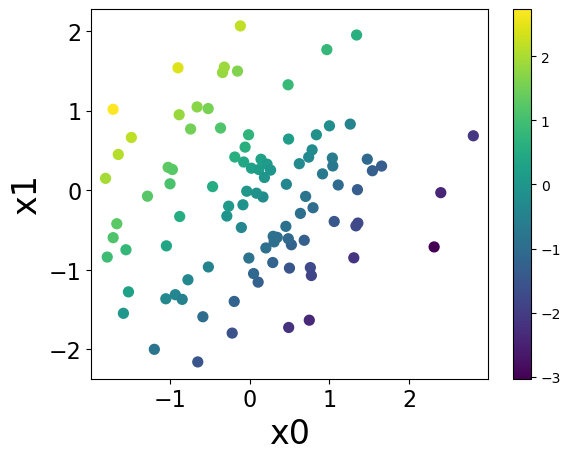

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Two-Layer Neural Network

We now create the two-layer neural network with 3 neurons (`num_neuron = 3`) in the first layer and a single neuron in the output layer ...

In [3]:
num_neurons = 3

def sigmoid(x):
    from numpy import exp
    return 1 / (1 + exp(-x))

def dnn2(wa, wb, x):
    return sigmoid(sigmoid(x @ wa) @ wb)

... randomly initialize its weights ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons)) # input weights layer 1
wb = rng.standard_normal(size=(num_neurons, 1)) # input weights layer 2 (output)

... and obtain its predictions for the input data.

In [5]:
y_p = dnn2(wa, wb, x)

**Note**

The calculation of neural network prediction can be made more explicit indicating all intermediate results (which are needed for the error back-propagation):

```python
def dnn2(wa, wb, x):
    x_a = x # input layer 1
    p_a = x_a @ wa # activation potential layer 1
    y_a = sigmoid(p_a) # output layer 1

    x_b = y_a # input layer 2 (output neuron)
    p_b = x_b @ wb # activation potential layer 2 (output neuron)
    y_b = p_b # (linear) output layer 2 (output neuron)

    return y_b
```

## Visualize Predictions by Randomly Initialized Neural Network

We now plot its predictions using the function `plot_pred_2d` from `plotting.py`.

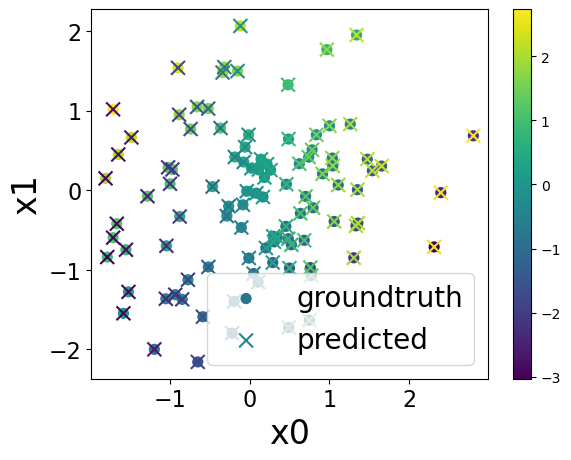

In [6]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)

## Training

We now train the neural network...

In [7]:
from numpy import reshape, transpose, sum
	
num_samples = len(x)
num_train_iterations = 10**5
eta = .1 # learning rate

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

for i in range(num_train_iterations):
	# select random sample
	selected = rng.integers(0, num_samples)
	x_selected = reshape(x[selected], (1, -1))
	y_gt_selected = reshape(y_gt[selected], (1, -1))

	# detailed neural network calculation
	x_selected_a = x_selected # input layer 1
	p_a = x_selected_a @ wa # activation potential layer 1
	y_selected_a = sigmoid(p_a) # output layer 1
	
	x_selected_b = y_selected_a # input layer 2
	p_b = x_selected_b @ wb # activation potential layer 2
	y_selected_b = p_b # output neuron layer 2 (output neuron)

	y_p_selected = y_selected_b
	
	# update weights
	error = y_p_selected - y_gt_selected

	delta_b = error * 1
	wb -= eta * delta_b * transpose(x_selected_b)

	delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
	wa -= eta * delta_a * transpose(x_selected_a)

	if i%100 == 0:
		print(f"{i} y_p={y_p_selected[0, 0]:.2f} error = {error[0, 0]:.2f}")

0 y_p=0.62 error = 1.63
100 y_p=-0.43 error = -0.04
200 y_p=-1.65 error = 0.79
300 y_p=1.76 error = -0.21
400 y_p=-0.34 error = -0.09
500 y_p=-1.31 error = -0.21
600 y_p=-0.41 error = -0.16
700 y_p=-1.29 error = 0.06
800 y_p=-1.44 error = -0.10
900 y_p=0.43 error = 0.08
1000 y_p=-0.12 error = -0.02
1100 y_p=-0.99 error = -0.06
1200 y_p=-1.80 error = -0.06
1300 y_p=-0.41 error = -0.08
1400 y_p=1.96 error = -0.14
1500 y_p=-1.04 error = -0.11
1600 y_p=-0.10 error = -0.01
1700 y_p=-1.32 error = -0.02
1800 y_p=-1.26 error = -0.16
1900 y_p=-1.34 error = -0.14
2000 y_p=-1.73 error = 0.00
2100 y_p=0.88 error = 0.04
2200 y_p=2.07 error = -0.11
2300 y_p=-1.34 error = 0.01
2400 y_p=1.42 error = 0.11
2500 y_p=-2.44 error = 0.59
2600 y_p=-1.40 error = -0.10
2700 y_p=-0.37 error = -0.04
2800 y_p=-1.52 error = -0.04
2900 y_p=-1.09 error = -0.08
3000 y_p=-0.27 error = -0.08
3100 y_p=1.40 error = 0.08
3200 y_p=-1.12 error = -0.19
3300 y_p=-0.74 error = -0.03
3400 y_p=0.17 error = 0.03
3500 y_p=-1.82 er

... and plot its performance, again using the function `plot_pred_2d` from `plotting.py`.

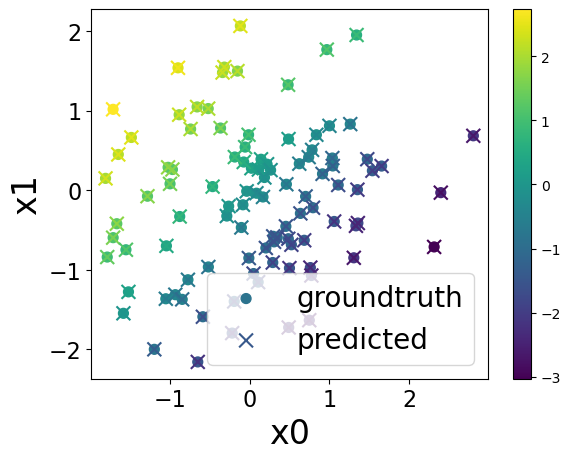

In [8]:
plot_pred_2d(x, y_gt, y_p=dnn2(wa, wb, x))

## Testing

We now check how the trained neuron works on the test data.

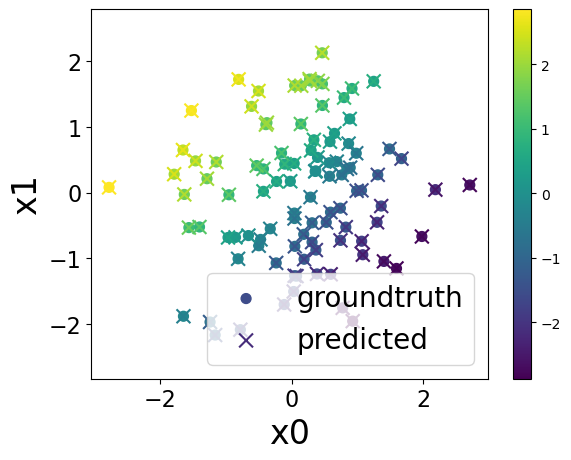

In [9]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_linear_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=dnn2(wa, wb, x_test))